# An Introduction To Pytorch
-----------------------------

It is suggested that you first start with [Anaconda](https://docs.anaconda.com/anaconda/install/index.html)

Install links:
- [Windows](https://repo.anaconda.com/archive/Anaconda3-2021.11-Windows-x86_64.exe)
- [OsX](https://repo.anaconda.com/archive/Anaconda3-2021.11-MacOSX-x86_64.pkg)
- [Linux](https://repo.anaconda.com/archive/Anaconda3-2021.11-Linux-x86_64.sh) (Find dependencies [here](https://docs.anaconda.com/anaconda/install/linux/))

Make sure you install both [PyTorch](https://pytorch.org/get-started/locally/) and Numpy

For numpy use `pip install numpy`

For PyTorch use `conda install pytorch torchvision cudatoolkit=11.3 -c pytorch` make sure your cudatoolkit is correct! (See link) If you don't have a gpu replace `cudatoolkit` with `cpuonly`

# Pytorch is (almost) Numpy!
-------------------

The beauty of pytorch is that you probably already know how to use it! If you've used numpy before you'll be very comfortable in pytorch. If you've used other languages like Matlab then you'll also find that you can be comfortable here.

So let's see a few things

### Numpy

### Pytorch

In [2]:
import numpy as np
np.random.seed(0)
numpy_x = np.random.randn(2,2)
print(numpy_x)

[[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]


In [1]:
import torch
# Numpy has already set our seed
torch.manual_seed(0)
torch_x = torch.randn(2,2)
print(torch_x)

tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684]])


## Oh no! We have different numbers, let's fix that

In [3]:
torch_x = torch.from_numpy(numpy_x)
print(torch_x)

tensor([[1.7641, 0.4002],
        [0.9787, 2.2409]], dtype=torch.float64)


In [4]:
print(numpy_x.sum())

5.3838407376420845


In [5]:
print(torch_x.sum())

tensor(5.3838, dtype=torch.float64)


In [6]:
print(np.exp(numpy_x))

[[5.83603919 1.49205924]
 [2.66109578 9.40172515]]


In [7]:
print(torch.exp(torch_x))

tensor([[5.8360, 1.4921],
        [2.6611, 9.4017]], dtype=torch.float64)


In [8]:
print(np.matmul(numpy_x, numpy_x))

[[3.50352974 1.60260783]
 [3.91979233 5.41325139]]


In [9]:
print(torch.matmul(torch_x, torch_x)) 
# Can also use torch.mm

tensor([[3.5035, 1.6026],
        [3.9198, 5.4133]], dtype=torch.float64)


In [10]:
print(np.sqrt(numpy_x))

[[1.32817632 0.6325798 ]
 [0.98931187 1.49696132]]


In [11]:
print(torch.sqrt(torch_x))

tensor([[1.3282, 0.6326],
        [0.9893, 1.4970]], dtype=torch.float64)


In [12]:
print(numpy_x.sqrt())

AttributeError: 'numpy.ndarray' object has no attribute 'sqrt'

In [13]:
print(torch_x.sqrt())

tensor([[1.3282, 0.6326],
        [0.9893, 1.4970]], dtype=torch.float64)


For the most part numpy and pytorch are very similar. Funtions will share similar names and you'll be able to guess what things are without needing to look up specific torch commands.

One advantage that torch has is that you can perform operations as if they are part of the tensor's class (last example). This can save typing and provide some added clarity

# Let's Train Our First Network!


We've talked about the theory in class, so let's pretend we all know what we're doing and just use torch APIs. 

# Get Some Data
The first thing we need to do is get some data. We'll use torch to get that and load it into a nice format for us.

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T

mnist_dataset = datasets.MNIST(root='./', # here
                               train=True, # train split
                               download=True, # we want to get the data
                               transform=T.ToTensor(), # put it into tensor format
                              )
train_data = DataLoader(mnist_dataset,
                        batch_size=2,
                        )

# Investigate the data
We don't actually know anything about our data, so let's see how it looks.

In [17]:
data = iter(train_data) # Let's iterate on it
single_point = next(data)
print(f"""Type: {type(single_point)}
Length: {len(single_point)}
More Types: {type(single_point[0])}, {type(single_point[1])}
Shapes: {single_point[0].shape}, {single_point[1].shape}
Labels: {single_point[1]}
""")

Type: <class 'list'>
Length: 2
More Types: <class 'torch.Tensor'>, <class 'torch.Tensor'>
Shapes: torch.Size([2, 1, 28, 28]), torch.Size([2])
Labels: tensor([5, 0])



We here can see that the dataloader gives us back a list `(data, label)`. We can see that both are tensors (thanks to our transform we did) and we can see the shapes. We know that the label tensor is corresponding answers. The data tensor is shaped in `batch, channel, height, width`. That's because it is image data (and we have some prior knowledge)

Let's also look at the data tensor we have `single_point[0]` (note that matplotlib by default will not use grayscale but viridis colormap. It is still a single channel but with higher readability)

We can see here that the two images that we grabbed are hand written versions of the two labels we grabbed. This makes sense since our MNIST dataset is hand written digits!

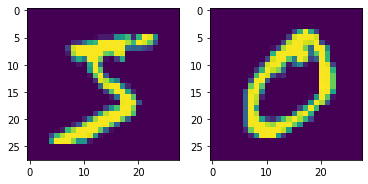

In [18]:
import matplotlib.pyplot as plt
ToPIL = T.ToPILImage() # Converting function
img0 = ToPIL(single_point[0][0])
img1 = ToPIL(single_point[0][1])
# Plotting
fig, axs = plt.subplots(1,2)
axs[0].imshow(img0)
axs[1].imshow(img1)

# Let's Make A Model

We will create a 3 layer neural network. This will have an input layer, a single hidden layer, and a single output layer.

Note that our input needs to be the size of the data. In the case of images it is $N_{channels} \times N_{height} \times N_{width}$ or in this case $1\times28\times28=784$

The size of the output also needs to be the number of unique classes that we have in our label. Here we know that we have the digits 0 to 9 so 10 total. 

The last thing is we'll use the `ReLU` regularization technique. 

In [1]:
from torch import nn

class SimpleNet(nn.Module):
    def __init__(self,
                 ninputs=28*28,
                 nhidden=512,
                 nout=10,
                ):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(ninputs, nhidden),
            nn.ReLU(),
            #nn.Linear(nhidden, nhidden),
            #nn.ReLU(),
            nn.Linear(nhidden, nout),
            nn.ReLU(),
        )
        
    def forward(self, x):
        b, c, h, w = x.shape
        x = x.view(b, -1) # Flatten image
        x = self.net(x)
        return x

# Setup the training program
Now we need to get the meat of the subject and get the parts we need to train the network.

In [20]:
from torch import optim
from tqdm import tqdm # This is optional but useful

# Let's get the right torch device (preference of GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Let's set up some parameters
learning_rate=5e-1
nepochs = 10
ninputs=28**2
nhidden=1024
nout=10

model = SimpleNet(ninputs=ninputs,
                  nhidden=nhidden,
                  nout=nout).to(device)
print(model)
# We need an optimizer that tells us what form of gradient descent to do
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# We also need a loss function
LossFunction = nn.CrossEntropyLoss()

# We're going to reload the data here so we have added clarity

batch_size = 2048

mnist_dataset = datasets.MNIST(root='./', # here
                               train=True, # train split
                               download=True, # we want to get the data
                               transform=T.ToTensor(), # put it into tensor format
                              )
train_data = DataLoader(mnist_dataset,
                        batch_size=batch_size,
                        )
# This is default on but let's just be pedantic
model.train()
loss_history = []
loss = torch.Tensor([0])
for epoch in tqdm(range(nepochs),
                  desc=f"Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True) # Here we clear the gradients
        
        # We need to make sure the tensors are on the same device as our model
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        
        loss = LossFunction(out, label)
        
        # PyTorch is Magic!
        loss.backward() # This function calculates all our gradients
        optimizer.step() # This function does our gradient descent with those gradients
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")


SimpleNet(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
    (3): ReLU()
  )
)


Epoch:  10%|█         | 1/10 [00:05<00:50,  5.62s/epoch]

Epoch 0: loss: 0.8114854693412781


Epoch:  20%|██        | 2/10 [00:10<00:43,  5.44s/epoch]

Epoch 1: loss: 0.6681225895881653


Epoch:  30%|███       | 3/10 [00:16<00:38,  5.55s/epoch]

Epoch 2: loss: 0.6302892565727234


Epoch:  40%|████      | 4/10 [00:21<00:32,  5.42s/epoch]

Epoch 3: loss: 0.6072165966033936


Epoch:  50%|█████     | 5/10 [00:27<00:26,  5.35s/epoch]

Epoch 4: loss: 0.4861915409564972


Epoch:  60%|██████    | 6/10 [00:32<00:21,  5.31s/epoch]

Epoch 5: loss: 0.22035054862499237


Epoch:  70%|███████   | 7/10 [00:37<00:15,  5.31s/epoch]

Epoch 6: loss: 0.1982366442680359


Epoch:  80%|████████  | 8/10 [00:42<00:10,  5.34s/epoch]

Epoch 7: loss: 0.18391700088977814


Epoch:  90%|█████████ | 9/10 [00:48<00:05,  5.39s/epoch]

Epoch 8: loss: 0.1712455302476883


Epoch: 100%|██████████| 10/10 [00:53<00:00,  5.37s/epoch]

Epoch 9: loss: 0.1601729840040207


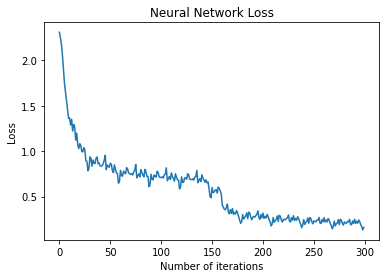

In [21]:
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# Testing
Now lets' see how well our network learned



In [22]:
# We need to do the test data now
mnist_test_dataset = datasets.MNIST(root='./', # here
                               train=False, # train split
                               download=True, # we want to get the data
                               transform=T.ToTensor(), # put it into tensor format
                              )
test_data = DataLoader(mnist_test_dataset,
                       batch_size=batch_size,
                        )

model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(mnist_test_dataset)*100:.2f}%")

Total accuracy = 94.17%


# Summary
You should play around with the above network and test different hyper parameters. Does the accuracy change? 

Try to answer the following questions:
- How does Learning Rate change the accuracy?
- How does batch size change things?
- How many hidden layers do we need?
- What happens if we use a different loss function?
- What about a different optimizer?
- Do we need to train longer?

# Getting more advanced
Let's get a bit more advanced with our network. This time we will design our network to take a variable number of hidden layers. We'll be able to add more depth to the network and define how many hidden layers are in that layer.

In [23]:
class LinearNet(nn.Module):
    def __init__(self,
                 ninputs=28*28,
                 hidden=[512],
                 nout=10,
                ):
        super().__init__()
        net = []
        # Input layer
        net.append(nn.Linear(ninputs, hidden[0]))
        net.append(nn.ReLU())
        
        # Hidden layers
        if len(hidden) > 1:
            for i in range(len(hidden)):
                if i == 0:
                    net.append(nn.Linear(hidden[i], hidden[i+1]))
                else:
                    net.append(nn.Linear(hidden[i-1], hidden[i]))
                net.append(nn.ReLU())

        # Output Layer
        net.append(nn.Linear(hidden[-1], nout))
        net.append(nn.ReLU())
        self.net = nn.Sequential(*net)
        
    def forward(self, x):
        b, c, h, w = x.shape
        x = x.view(b, -1) # Flatten image
        x = self.net(x)
        return x

LinearNet(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
    (3): ReLU()
  )
)


Epoch:  10%|█         | 1/10 [00:04<00:42,  4.76s/epoch]

Epoch 0: loss: 0.9082605242729187


Epoch:  20%|██        | 2/10 [00:09<00:37,  4.69s/epoch]

Epoch 1: loss: 0.5298245549201965


Epoch:  30%|███       | 3/10 [00:14<00:33,  4.77s/epoch]

Epoch 2: loss: 0.49071282148361206


Epoch:  40%|████      | 4/10 [00:18<00:28,  4.75s/epoch]

Epoch 3: loss: 0.46168965101242065


Epoch:  50%|█████     | 5/10 [00:23<00:23,  4.73s/epoch]

Epoch 4: loss: 0.44404029846191406


Epoch:  60%|██████    | 6/10 [00:28<00:18,  4.71s/epoch]

Epoch 5: loss: 0.4292517602443695


Epoch:  70%|███████   | 7/10 [00:32<00:14,  4.68s/epoch]

Epoch 6: loss: 0.20080174505710602


Epoch:  80%|████████  | 8/10 [00:37<00:09,  4.69s/epoch]

Epoch 7: loss: 0.18559202551841736


Epoch:  90%|█████████ | 9/10 [00:42<00:04,  4.69s/epoch]

Epoch 8: loss: 0.17299044132232666


Epoch: 100%|██████████| 10/10 [00:47<00:00,  4.71s/epoch]

Epoch 9: loss: 0.16226248443126678


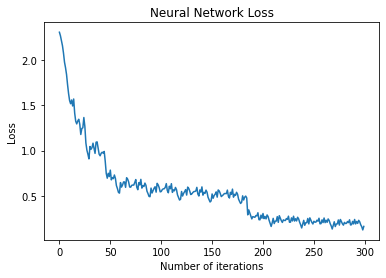

In [24]:
# Let's set up some parameters
learning_rate=5e-1
nepochs = 10
ninputs=28**2
hidden=[512]
nout=10

model = LinearNet(ninputs=ninputs,
                  hidden=hidden,
                  nout=nout).to(device)
print(model)
# We need an optimizer that tells us what form of gradient descent to do
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# We also need a loss function
LossFunction = nn.CrossEntropyLoss()

# We're going to reload the data here so we have added clarity

batch_size = 2048

mnist_dataset = datasets.MNIST(root='./', # here
                               train=True, # train split
                               download=True, # we want to get the data
                               transform=T.ToTensor(), # put it into tensor format
                              )
train_data = DataLoader(mnist_dataset,
                        batch_size=batch_size,
                        )
# This is default on but let's just be pedantic
model.train()
loss_history = []
for epoch in tqdm(range(nepochs),
                  desc="Epoch",
                  unit="epoch",
                  disable=False):
    for (data, label) in tqdm(train_data,
                              desc="iteration",
                              unit="%",
                              disable=True):
        optimizer.zero_grad(set_to_none=True)
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        loss = LossFunction(out, label)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    print(f"Epoch {epoch}: loss: {loss.item()}")
    
# Note that we are not plotting loss per epoch but per iteration
plt.plot(loss_history)
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [25]:
model.eval()
accuracy = 0
for (data, label) in test_data:
    data = data.to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy = {accuracy / len(mnist_test_dataset)*100:.2f}%")

Total accuracy = 94.52%


# Getting More Out of PyTorch

In [26]:
# Let's see what datasets are offered (https://pytorch.org/vision/stable/datasets.html)
print(datasets.__dir__())

['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'vision', 'utils', 'lsun', 'LSUN', 'LSUNClass', 'folder', 'ImageFolder', 'DatasetFolder', 'coco', 'CocoCaptions', 'CocoDetection', 'cifar', 'CIFAR10', 'CIFAR100', 'stl10', 'STL10', 'mnist', 'MNIST', 'EMNIST', 'FashionMNIST', 'KMNIST', 'QMNIST', 'svhn', 'SVHN', 'phototour', 'PhotoTour', 'fakedata', 'FakeData', 'semeion', 'SEMEION', 'omniglot', 'Omniglot', 'sbu', 'SBU', 'flickr', 'Flickr8k', 'Flickr30k', 'voc', 'VOCSegmentation', 'VOCDetection', 'cityscapes', 'Cityscapes', 'imagenet', 'ImageNet', 'caltech', 'Caltech101', 'Caltech256', 'celeba', 'CelebA', 'widerface', 'WIDERFace', 'sbd', 'SBDataset', 'VisionDataset', 'usps', 'USPS', 'video_utils', 'kinetics', 'Kinetics400', 'Kinetics', 'hmdb51', 'HMDB51', 'ucf101', 'UCF101', 'places365', 'Places365', 'kitti', 'Kitti', 'inaturalist', 'INaturalist', 'lfw', 'LFWPeople', 'LFWPairs', '__all__']


In [27]:
# What about optimizers?
print(optim.__dir__())

['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', '_functional', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'SparseAdam', 'Adamax', 'ASGD', 'SGD', 'RAdam', 'Rprop', 'RMSprop', 'Optimizer', 'NAdam', 'LBFGS', 'lr_scheduler', 'swa_utils', '_multi_tensor']
